To train deep learning algorithms, the following ingredients are required:

- Training data (inputs and targets) 
- The model (also called the network) 
- The loss function (also called the objective function or criterion)
- The optimizer

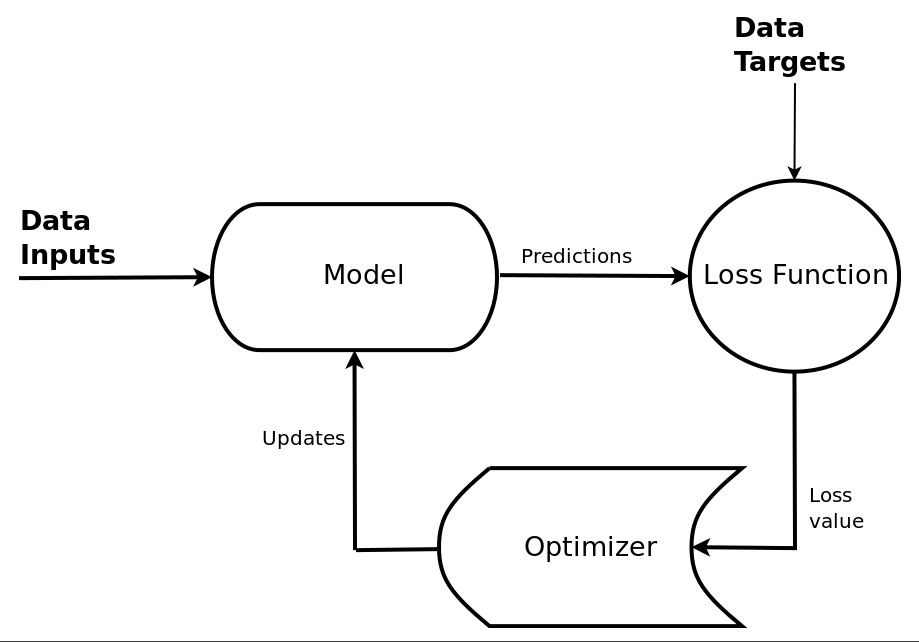

The training process for deep learning algorithms is an iterative process. In each iteration, we select a batch of training data. Then, we feed the data to the model to get the model output. After that, we calculate the loss value. Next, we compute the gradients of the loss function with respect to the model parameters (also known as the weights). Finally, the optimizer updates the parameters based on the gradients. This loop continues. We also use a validation dataset to track the model's performance during training. We stop the training process when the performance plateaus.

# import libraries

In [1]:
import torchvision
import torch

In [2]:
torchvision.__version__
torch.__version__

'1.5.1'

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.device_count()

1

In [5]:
torch.cuda.current_device()

0

In [6]:
torch.cuda.get_device_name(0)

'GeForce RTX 2060'

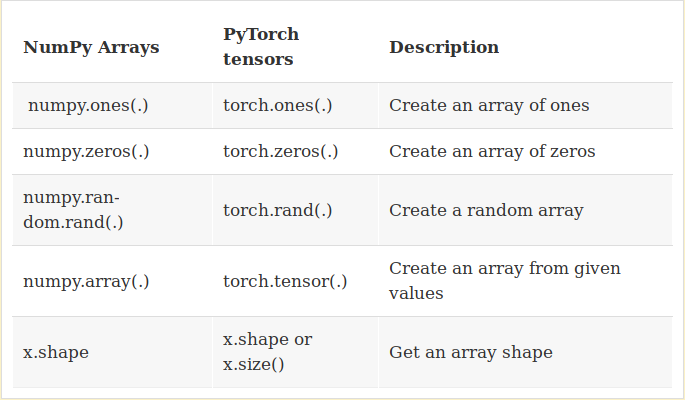

# Basic pytorch operations

In [7]:
x = torch.ones(2, 2)
print(x)
print(x.dtype)

tensor([[1., 1.],
        [1., 1.]])
torch.float32


In [8]:
x = torch.ones(2, 2, dtype=torch.int8)
print(x)
print(x.dtype)

tensor([[1, 1],
        [1, 1]], dtype=torch.int8)
torch.int8


### Changing the tensor's data type

In [9]:
x=torch.ones(1,dtype=torch.uint8)
print(x.dtype)

torch.uint8


In [10]:
x=x.type(torch.float)
print(x.dtype)

torch.float32


### Converting tensors into NumPy arrays

In [11]:
x=torch.rand(2,2)
print(x)
print(x.dtype)

tensor([[0.8418, 0.5007],
        [0.5289, 0.1334]])
torch.float32


In [12]:
y=x.numpy()
print(y)
print(y.dtype)

[[0.8418034  0.50074464]
 [0.5288929  0.13336343]]
float32


### Converting NumPy arrays into tensors

In [13]:
import numpy as np
x=np.zeros((2,2),dtype=np.float32)
print(x)
print(x.dtype)

[[0. 0.]
 [0. 0.]]
float32


In [14]:
y=torch.from_numpy(x)
print(y)
print(y.dtype)

tensor([[0., 0.],
        [0., 0.]])
torch.float32


# Moving tensors between devices

## Define a tensor on CPU:

In [15]:
x = torch.tensor([1.5, 2])
print(x)
print(x.device)

tensor([1.5000, 2.0000])
cpu


### check if cuda is present

In [16]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")

### Move the tensor onto the CUDA device:

In [17]:
x = x.to(device)
print(x)
print(x.device)

tensor([1.5000, 2.0000], device='cuda:0')
cuda:0


### move back to cpu

In [18]:
x = x.to("cpu")

In [19]:
print(x)
print(x.device)

tensor([1.5000, 2.0000])
cpu


In [20]:
device = torch.device("cuda:0")
x = torch.ones(2,2, device=device) 
print(x)

tensor([[1., 1.],
        [1., 1.]], device='cuda:0')


# Loading and preprocessing data

## First, we will load the MNIST training dataset:

In [21]:
from torchvision import datasets

path2data = "./data"

train_data = datasets.MNIST(path2data, train=True, download=True)

## Then, we will extract the input data and target labels:

In [22]:
x_train, y_train = train_data.data, train_data.targets
print(x_train.shape)
print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


## Next, we will load the MNIST test dataset:

In [23]:
val_data=datasets.MNIST(path2data, train=False, download=True)

## Then, we will extract the input data and target labels:

In [24]:
# extract data and targets
x_val,y_val=val_data.data, val_data.targets
print(x_val.shape)
print(y_val.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])


## After that, we will add a new dimension to the tensors:

In [25]:
if len(x_train.shape)==3:
    x_train=x_train.unsqueeze(1)
print(x_train.shape)

if len(x_val.shape)==3:
    x_val=x_val.unsqueeze(1)
print(x_val.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


## Next, we will import the required packages: 

In [26]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Then, we will define a helper function to display tensors as images: 

In [27]:
def show(img):
    # convert tensor to numpy array
    npimg = img.numpy()
    
    # convert to H*W*C shape
    npimg_tr=np.transpose(npimg, (1,2,0))
    
    plt.imshow(npimg_tr, interpolation='nearest')

## Next, we will create a grid of images and display them:

torch.Size([3, 152, 242])


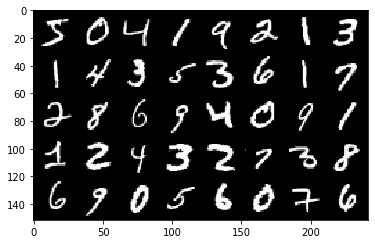

In [28]:
x_grid = utils.make_grid(x_train[:40], nrow=8, padding=2)
print(x_grid.shape)

show(x_grid)

# Data transformation (also called augmentation)

## Let's define a transform class in order to apply some image transformations on the MNIST dataset:

In [29]:
from torchvision import transforms


train_data = datasets.MNIST(path2data, train=True, download=True)

# define transformation
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.RandomVerticalFlip(p=1),
    transforms.ToTensor(),
])

## Let's apply the transformations on an image from the MNIST dataset:

Text(0.5, 1.0, 'transform')

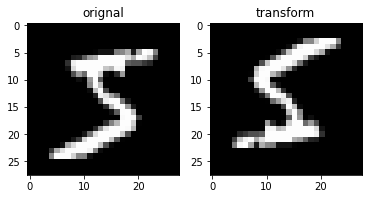

In [30]:
img = train_data[0][0]

img_tr=data_transform(img)

img_tr_np=img_tr.numpy()

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(img_tr_np[0], cmap="gray")
plt.title("transform")

## We can also pass the transformer function to the dataset class:

In [31]:
# define transformations
data_transform = transforms.Compose([
        transforms.RandomHorizontalFlip(1),
        transforms.RandomVerticalFlip(1),
        transforms.ToTensor(),
    ])

# Loading MNIST training data with on-the-fly transformations
train_data=datasets.MNIST(path2data, train=True, download=True, transform=data_transform)

# Wrapping tensors into a dataset

## Let's create a PyTorch dataset by wrapping x_train and y_train :
If your data is available in tensors, you can wrap them as a PyTorch dataset using the TensorDataset class. This will make it easier to iterate over data during training. Let's get started:

In [32]:
from torch.utils.data import TensorDataset

# wrap tensors into a dataset
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)

for x,y in train_ds:
    print(x.shape,y.item())
    break


torch.Size([1, 28, 28]) 5


## Creating data loaders
To easily iterate over the data during training, we can create a data loader using the DataLoader class, as follows:

# Creating data loaders
To easily iterate over the data during training, we can create a data loader using the DataLoader class, as follows:

In [33]:
from torch.utils.data import DataLoader

# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

# iterate over batches
for xb,yb in train_dl:
    print(xb.shape)
    print(yb.shape)
    break

torch.Size([8, 1, 28, 28])
torch.Size([8])


# How it works...

<br>First, we imported the datasets package from torchvision. This package contains several famous datasets, including MNIST. Then, we downloaded the MNIST training dataset into a local folder. Once downloaded, you can set the download flag to False in future runs. Next, we extracted the input data and target labels into PyTorch tensors and printed their size. Here, the training dataset contains 60,000 inputs and targets. Then, we repeated the same step for the MNIST test dataset. To download the MNIST test dataset, we set the train flag to False. Here, the test dataset contains 10,000 inputs and targets.
<br>
Next, we added a new dimension to the input tensors since we want the tensor shape to be B*C*H*W, where B, C, H, and W are batch size, channels, height, and width, respectively. This is the common shape for the inputs tensors in PyTorch. Then, we defined a helper function to display sample images. We used utils from torchvision to create a grid of 40 images in five rows and eight columns.
<br>
In the Data transformation subsection, we introduced the torchvision.transforms package. This package provides multiple transformation functions. We composed the RandomHorizontalFlip and RandomVerticalFlip methods to augment the dataset and the ToTensor method to convert images into PyTorch tensors. The probability of horizontal and vertical flips was set to p=1 to enforce flipping in the next step. We employed the data transformer on a sample image. Check out the original and the transformed image. The transformed image has been flipped both vertically and horizontally.
<br>
Then, we passed the transformer function to the dataset class. This way, data transformation will happen on-the-fly. This is a useful technique for large datasets that cannot be loaded into memory all at once. 
<br>
In the Wrapping tensors into a dataset subsection, we created a dataset from tensors. For example, we can create a PyTorch dataset by wrapping x_train and y_train. This technique will be useful for cases where the input and output data is available as tensors.

<br>In the Creating data loaders subsection, we used the DataLoader class to define data loaders. This is a good technique to easily iterate over datasets during training or evaluation. When creating a data loader, we need to specify the batch size. We created two data loaders from train_ds and val_ds. Then, we extracted a mini-batch from train_dl. Check out the shape of the mini-batch.

# Defining a linear layer
Let's create a linear layer and print out its output size:

In [34]:
from torch import nn

# input tensor dimension 64*1000
input_tensor = torch.randn(64, 1000)

# linear layer with 1000 inputs and 100 outputs
linear_layer = nn.Linear(1000, 100)

output = linear_layer(input_tensor)
print(output.size())

torch.Size([64, 100])


# Defining models using nn.Sequential 
We can use the nn.Sequential package to create a deep learning model by passing layers in order. Consider the two-layer neural network depicted in the following image:

In [35]:
from torch import nn

# define a two layer model
model = nn.Sequential(
nn.Linear(4, 5),
nn.ReLU(),
nn.Linear(5, 1))

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


# Defining models using nn.Module
Another way of defining models in PyTorch is by subclassing the nn.Module class. In this method, we specify the layers in the __init__ method of the class. Then, in the forward method, we apply the layers to inputs. This method provides better flexibility for building customized models.

Consider a multilayer model, as shown in the following image:

In [38]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
    Net.__init__ = __init__
    Net.forward = forward

In [39]:
model = Net()    
print(model)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


# Moving the model to a CUDA device

A model is a collection of parameters. By default, the model will be hosted on the CPU:

Let's get the model's device:

In [40]:
print(next(model.parameters()).device)

cpu


In [41]:
device = torch.device("cuda:0")

In [42]:
model.to(device)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [43]:
print(next(model.parameters()).device)

cuda:0


In [44]:
! pip install torchsummary

In [45]:
from torchsummary import summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 24, 24]             520
            Conv2d-2             [-1, 50, 8, 8]          25,050
            Linear-3                  [-1, 500]         400,500
            Linear-4                   [-1, 10]           5,010
Total params: 431,080
Trainable params: 431,080
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.12
Params size (MB): 1.64
Estimated Total Size (MB): 1.76
----------------------------------------------------------------


## How it works...

First, we showed you how to create a linear layer using the nn package. The linear layer receives the input of the 64*1000 dimension, holds the weights of the 1000*100 dimension, and computes the output of the 64*100 dimension.

Next, we defined a two-layer neural network using nn.Sequential. There were four neurons in the input layer, five neurons in the hidden layer, and one neuron in the output layer. Using the print command, you can visualize the model's layers.

Next, we defined a multilayer model using nn.Module. The model has two Conv2d layers and two fully connected linear layers. For better code readability, we presented the Net class in a few snippets. First, we defined the bulk of the class. Then, we defined the __init__ function. As you saw, two Conv2d layers and two linear layers were defined in this function. Next, we defined the forward function. In this function, we defined the outline of the model and the way layers are connected to each other.

We used relu and max_pool2d from torch.nn.functional to define the activation function and pooling layers, respectively. Check out the way we used the .view method to flatten the extracted features from the Conv2d layers. The feature size was 4*4 and there were 50 channels in the self.conv2 layer. Due to this, the flatten size is 50*4*4. Also, check out the returned values from the forward function. As we saw, the log_softmax function was applied to the outputs. Next, we overrode the Net class functions. Finally, we created an object of the Net class and called it model. Then, we printed the model. Note that the print command does not show functional layers such as relu and max_pool2d. 

In the Moving the model to a CUDA device subsection, we verified that the model was hosted on the CPU device. Then, we moved the model to the CUDA device using the .to method. Here, we moved the first GPU or "cuda:0". If your system is equipped with multiple GPU devices, you can select a different number, for instance, "cuda:2".

Next, we installed the torchsummary package in the conda environment using the provided command.

If you do not want to install this package, the other option is to copy torchsummary.py into the folder of your code.

To get a model summary using torchsummary, we need to pass the input dimension to the summary function. For our MNIST example, we passed (1,28,28) as the input dimension and displayed the model summary. As seen, the output shape and the number of parameters of each layer, except functional layers, is shown in the summary. 

Finally, we got the model summary using the torchsummary package.

# Defining the loss function and optimizer

The loss function computes the distance between the model outputs and targets. It is also called the objective function, cost function, or criterion. Depending on the problem, we will define the appropriate loss function. For instance, for classification problems, we usually define the cross-entropy loss.

We use the optimizer to update the model parameters (also called weights) during training. The optim package in PyTorch provides implementations of various optimization algorithms. These include stochastic gradient descent (SGD) and its variants, that is, Adam, RMSprop, and so on.

#### in simple terms: when output is calculated the loss function finds the distance between actual value and calculated value, and optimizer take that value and adjust the weights of the model so next time the model may predict a better result.

# Defining the loss function

First, we will define the negative log-likelihood loss:

In [46]:
from torch import nn
loss_func = nn.NLLLoss(reduction="sum")

In [47]:
for xb, yb in train_dl:
    # move batch to cuda device
    xb=xb.type(torch.float).to(device)
    yb=yb.to(device)
    # get model output
    out=model(xb)
    # calculate loss value
    loss = loss_func(out, yb)
    print (loss.item())
    break

75.08506774902344


Let's compute the gradients with respect to the model parameters:

In [48]:
loss.backward()

# Defining the optimizer

We will define the optimizer and present the steps backward. Let's get started:

Let's define the Adam optimizer:

In [49]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=1e-4)

In [50]:
# update model parameters
opt.step()

In [51]:
# set gradients to zero
opt.zero_grad()

## How it works...

First, we defined the loss function. We used the torch.nn package to define the negative log-likelihood loss. This loss is useful for training a classification problem with multiple classes. The input to this loss function should be log-probabilities. If you recall from the Building models section, we applied log_softmax at the output layer to get log-probabilities from the model. Next, we presented the forward path. We extracted a mini-batch, fed it to the model, and calculated the loss value. Next, we used the .backward method to compute the gradients of the loss with respect to the model parameters. This step will be used during the backpropagation algorithm.

Next, we define the Adam optimizer. The inputs to the optimizer are the model parameters and the learning rate. Then, we presented the .step() model to automatically update the model parameters. Don't forget to set the gradients to zero before computing the gradients of the next batch.

# Training and evaluation | helper functions

Let's develop a helper function to compute the loss value per mini-batch:

In [52]:
def loss_batch(loss_func, xb, yb,yb_h, opt=None):
    # obtain loss
    loss = loss_func(yb_h, yb)
    
    # obtain performance metric
    metric_b = metrics_batch(yb,yb_h)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), metric_b

Next, we will define a helper function to compute the accuracy per mini-batch:

In [53]:
def metrics_batch(target, output):
    # obtain output class
    pred = output.argmax(dim=1, keepdim=True)
    
    # compare output class with target class
    corrects=pred.eq(target.view_as(pred)).sum().item()
    return corrects

# Training and evaluation

We will develop helper functions for batch and epoch processing and training the model. Let's get started:

In [54]:
def loss_batch(loss_func, xb, yb, yb_h, opt=None):
    # obtain loss
    loss = loss_func(yb_h, yb)
    
    # obtain performance metric
    metric_b = metrics_batch(yb, yb_h)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
    
    return loss.item(), metric_b

Next, we will define a helper function to compute the accuracy per mini-batch:

In [55]:
def metrics_batch(target, output):
    # obtain output class
    pred = output.argmax(dim=1, keepdim=True)
    
    # compare output class with target class
    corrects=pred.eq(target.view_as(pred)).sum().item()
    return corrects

In [56]:
def loss_epoch(model,loss_func,dataset_dl,opt=None):
    loss=0.0
    metric=0.0
    len_data=len(dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb=xb.type(torch.float).to(device)
        yb=yb.to(device)
        
        # obtain model output
        yb_h=model(xb)

        loss_b,metric_b=loss_batch(loss_func, xb, yb,yb_h, opt)
        loss+=loss_b
        if metric_b is not None:
            metric+=metric_b
    loss/=len_data
    metric/=len_data
    return loss, metric

In [57]:
def train_val(epochs, model, loss_func, opt, train_dl, val_dl):
    for epoch in range(epochs):
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,opt)
  
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl)
        
        accuracy=100*val_metric

In [58]:
# call train_val function
num_epochs=5
train_val(num_epochs, model, loss_func, opt, train_dl, val_dl)

# Storing and loading models
First, we will store the model parameters or state_dict in a file:

In [60]:
! mkdir models

In [61]:
# define path2weights
path2weights="./models/weights_simple_pytorch.pt"

# store state_dict to file
torch.save(model.state_dict(), path2weights)

In [62]:
# define model: weights are randomly initiated
_model = Net()

In [63]:
# Then we will load state_dict from the file
weights=torch.load(path2weights)

In [64]:
# Next, we will set state_dict to the model:
_model.load_state_dict(weights)

<All keys matched successfully>